In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from collections import Counter
warnings.simplefilter(action="ignore")

df=pd.read_csv("/content/spam.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.dtypes

,0
Category,object
Message,object


In [ ]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [ ]:
df.isna().sum()

,0
Category,0
Message,0


In [ ]:
df.isnull().sum()

,0
Category,0
Message,0


In [ ]:
df.groupby("Category").describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [ ]:
ham=df.Category=="ham"
ham.sum()

4825

In [ ]:
spam=df.Category=="spam"
spam.sum()

747

In [ ]:
df["spam"]=df["Category"].apply(lambda X:1 if X=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
df["spam"].value_counts()

,count
spam,
0,4825
1,747


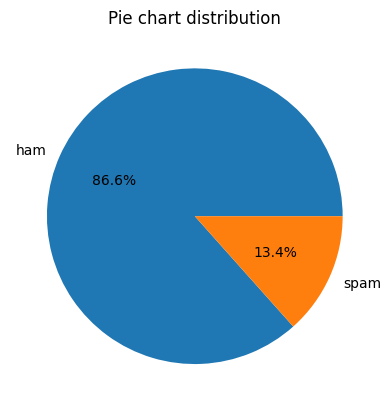

In [ ]:
plt.pie(x=df["spam"].value_counts(),labels=['ham','spam'],autopct='%1.1f%%')
plt.title('Pie chart distribution')
plt.show()

In [ ]:
from collections import Counter
count1 = Counter(" ".join(df[df["Category"]=="ham"]["Message"]).split()).most_common(20)
df1=pd.DataFrame.from_dict(count1)
df1
df1=df1.rename(columns={0:"words in non_spam", 1:"count"})
df1

,words in non_spam,count
0,to,1538
1,you,1462
2,I,1439
3,the,1029
4,a,977
5,i,742
6,and,739
7,in,736
8,u,651
9,is,645


In [ ]:
count2 = Counter(" ".join(df[df["Category"]=="spam"]["Message"]).split()).most_common(20)
df2=pd.DataFrame.from_dict(count2)
df2


,0,1
0,to,604
1,a,360
2,your,187
3,or,185
4,call,183
5,the,175
6,2,169
7,for,169
8,you,164
9,is,142


In [ ]:
df2=df2.rename(columns={0:"words in spam", 1:"count"})
df2

,words in spam,count
0,to,604
1,a,360
2,your,187
3,or,185
4,call,183
5,the,175
6,2,169
7,for,169
8,you,164
9,is,142


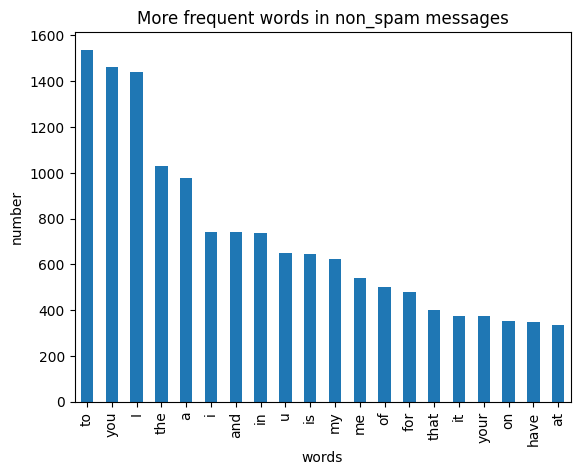

In [ ]:
df1.plot.bar(legend=False)
y_pos=np.arange(len(df1["words in non_spam"]))
plt.xticks(y_pos,df1["words in non_spam"])
plt.title("More frequent words in non_spam messages")
plt.xlabel("words")
plt.ylabel("number")
plt.show()

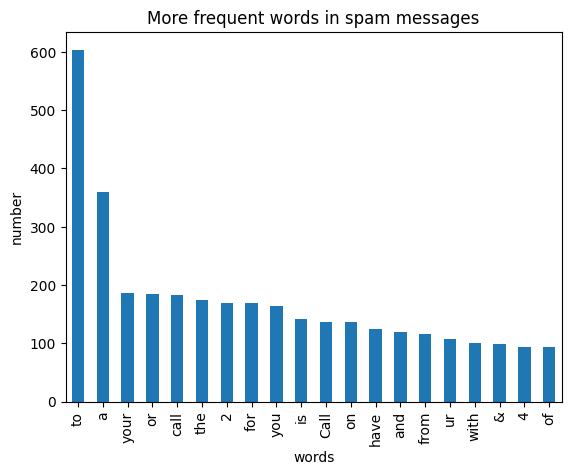

In [ ]:
df2.plot.bar(legend=False)
y_pos=np.arange(len(df2["words in spam"]))
plt.xticks(y_pos,df2["words in spam"])
plt.title("More frequent words in spam messages")
plt.xlabel("words")
plt.ylabel("number")
plt.show()

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
for category in df["Category"].unique():
  text=" ".join(df[df["Category"]==category]["Message"])
  wordcloud=WordCloud(width=600, height=400, background_color="white").generate(text)

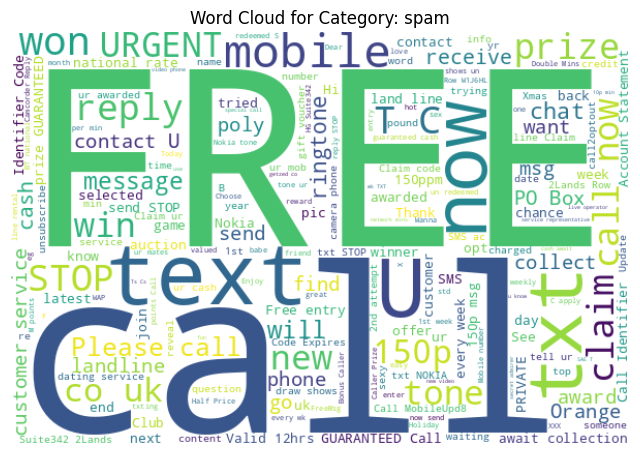

In [ ]:
  plt.figure(figsize=(8, 6))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.title(f"Word Cloud for Category: {category}")
  plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer()
X=vect.fit_transform(df["Message"])
Y=df["spam"]

In [ ]:
dir(vect)

['_CountVectorizer__metadata_request__fit',
 '_CountVectorizer__metadata_request__transform',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_feature_names',
 '_check_n_features',
 '_check_params',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_limit_features',
 '_more_tags',
 '_parameter_

In [ ]:
vect.vocabulary_

{'go': 3567,
 'until': 8080,
 'jurong': 4370,
 'point': 5954,
 'crazy': 2334,
 'available': 1313,
 'only': 5567,
 'in': 4110,
 'bugis': 1763,
 'great': 3651,
 'world': 8544,
 'la': 4497,
 'buffet': 1761,
 'cine': 2057,
 'there': 7690,
 'got': 3611,
 'amore': 1079,
 'wat': 8320,
 'ok': 5534,
 'lar': 4533,
 'joking': 4338,
 'wif': 8446,
 'oni': 5563,
 'free': 3369,
 'entry': 2959,
 'wkly': 8502,
 'comp': 2174,
 'to': 7802,
 'win': 8459,
 'fa': 3096,
 'cup': 2394,
 'final': 3217,
 'tkts': 7789,
 '21st': 410,
 'may': 4955,
 '2005': 401,
 'text': 7640,
 '87121': 791,
 'receive': 6336,
 'question': 6228,
 'std': 7275,
 'txt': 7982,
 'rate': 6280,
 'apply': 1166,
 '08452810075over18': 77,
 'dun': 2811,
 'say': 6675,
 'so': 7070,
 'early': 2832,
 'hor': 3948,
 'already': 1051,
 'then': 7684,
 'nah': 5266,
 'don': 2720,
 'think': 7705,
 'he': 3801,
 'goes': 3575,
 'usf': 8126,
 'lives': 4688,
 'around': 1217,
 'here': 3852,
 'though': 7725,
 'freemsg': 3376,
 'hey': 3862,
 'darling': 2451,
 'it

In [ ]:
from imblearn.over_sampling import SMOTE
smote= SMOTE()
x_resampled,y_resampled=smote.fit_resample(X,Y)
print(x_resampled)
print(y_resampled)

  (0, 3567)	0.14786475068980162
  (0, 8080)	0.2300034410835773
  (0, 4370)	0.32645117023873077
  (0, 5954)	0.25533539230157154
  (0, 2334)	0.25281395947472957
  (0, 1313)	0.24417482890859654
  (0, 5567)	0.156366230319576
  (0, 4110)	0.10707657674366398
  (0, 1763)	0.2757872678027423
  (0, 3651)	0.1803318063070826
  (0, 8544)	0.22081883351949952
  (0, 4497)	0.2757872678027423
  (0, 1761)	0.31163292870610654
  (0, 2057)	0.2757872678027423
  (0, 7690)	0.15550627816331297
  (0, 3611)	0.15304155020494287
  (0, 1079)	0.32645117023873077
  (0, 8320)	0.18240101628302693
  (1, 5534)	0.2718944069420321
  (1, 4533)	0.4083258549263009
  (1, 4338)	0.5236804332035243
  (1, 8446)	0.43162957585464123
  (1, 5563)	0.5466243141314314
  (2, 4110)	0.07913674465201573
  (2, 3369)	0.11310793123981583
  :	:
  (9648, 7802)	0.05400218468098032
  (9648, 4110)	0.07204387727182639
  (9649, 189)	0.004072901894853624
  (9649, 188)	0.33160183737022597
  (9649, 5942)	0.32043782233446144
  (9649, 4518)	0.25107375773549

In [ ]:
#TRAIN_TEST_SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_resampled,y_resampled)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((7237, 8709), (2413, 8709), (7237,), (2413,))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model= MultinomialNB(alpha=1)
model.fit(X_train,Y_train)


MultinomialNB(alpha=1)

In [ ]:
emails= ["Hey raj, can we go for lunch tomorrow?",
         "Wow! 20% discount on placements, exclusive offer just for you. Dont miss this reward!"]
emails_count=vect.transform(emails)
model.predict(emails_count)

array([0, 1])

In [ ]:
!pip install pillow

In [ ]:
import pickle
with open('NB_model.pkl',"wb") as model_file:
  pickle.dump(model,model_file)
with open('vectorize.pkl',"wb") as vectorizer_file:
  pickle.dump(vect,vectorizer_file)